### <p style="text-align: right;"> Nicolas Dronchi </p>

#### <p style="text-align: right;"> Yitian, Jake, David </p>

# Day 23 In-Class Assignment: Artificial Neural Network

</p>

<img src= "https://ml4a.github.io/images/temp_fig_mnist.png" width=500px>
<p style="text-align: right;">From: Machine Learning for Artists - https://ml4a.github.io/</p>



1. **Scientific motivation** 
    - Data Analysis / Pattern Recognition
2. **Modeling tools** 
    - Artificial Neural networks
    - Error Calculations
3. **Programming concepts** 
    - More Debugging
    - Selecting and using libraries
4. **Python Programming Concepts** 
    - More Understanding classes

## Agenda for today's class 

</p>
1. Review pre-class assignment
1. Modify code to be more flexible
1. Use our ANN on the "Digits" dataset
1. Finding/Using Neural Networks Libraries

---

# 1. Review pre-class assignment

Below we summarize the steps involved in designing and training a feed-forward artificial neural network. We will use the [partSix.py](./partSix.py) file provided in the "Neural Networks Demystified" module which can be downloaded from github:

    git clone https://github.com/stephencwelch/Neural-Networks-Demystified



In [2]:
# %load partSix.py
# Neural Networks Demystified
# Part 6: Training
#
# Supporting code for short YouTube series on artificial neural networks.
#
# Stephen Welch
# @stephencwelch


## ----------------------- Part 1 ---------------------------- ##
import numpy as np

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

## ----------------------- Part 5 ---------------------------- ##

class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2

    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)

            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0

        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N

    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        return cost, grad

    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res


In [3]:
print("Input Data", X)
print("Output Data", y)

Input Data [[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]
Output Data [[0.75]
 [0.82]
 [0.93]]


In [4]:
#Untrained Random Network
NN = Neural_Network()
y1 = NN.forward(X)
print("Untrained Output", y1)

Untrained Output [[0.40080444]
 [0.43447789]
 [0.42423465]]


In [5]:
#Training step
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 56
         Gradient evaluations: 56


In [6]:
#Trained Network
y2 = NN.forward(X)
print("Trained Output",y2)


Trained Output [[0.75003127]
 [0.81998936]
 [0.92991079]]


&#9989; **DO THIS:** Calculate and compare the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) for untrained network (```y1```) and the trained network (```y2```). 

In [8]:
#Put your code here
def MSE(y, yhat):
    return (1/len(y1))*sum((y-yhat)**2)

print(MSE(y, y1))
print(MSE(y, y2))

[0.17545447]
[3.01663395e-09]


----

# 2. Modify code to be more flexible

The code for our Neural Network example above assumes an input layer size of 2, hidden layer size of 3 and an output layer size of 1.  


&#9989; **DO THIS:** Modify the code in Section 1 above so that the user can specify these as inputs when creating the Neural_Network object.  The default values should stay the same. Rerun the above example to make sure it still works. 

In [9]:
class Neural_Network(Neural_Network):
    def __init__(self,insize, outsize, hiddensize):
        #Define Hyperparameters
        self.inputLayerSize = insize
        self.outputLayerSize = outsize
        self.hiddenLayerSize = hiddensize

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

In [39]:
#Untrained Random Network
NN = Neural_Network(2,1,5)
y1 = NN.forward(X)
print("Untrained Output", y1)

Untrained Output [[0.40867166]
 [0.36286813]
 [0.35807708]]


In [40]:
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 53
         Gradient evaluations: 53


In [41]:
#Trained Network
y2 = NN.forward(X)
print("Trained Output",y2)


Trained Output [[0.75000449]
 [0.81997275]
 [0.92997594]]


In [42]:
print(MSE(y, y1))
print(MSE(y, y2))

[0.21752347]
[4.47242084e-10]


---
# 3. Use our ANN on the "Digits" dataset.

Here is the code copied from out previous Machine Learning Module which downloads the "digits" dataset and separates it into training and testing sets. 

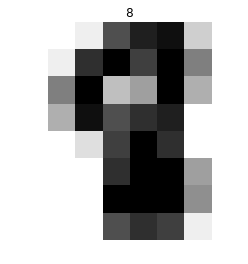

In [100]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people, load_digits
from sklearn.cross_validation import train_test_split

sk_data = load_digits();

#Cool slider to browse all of the images.
from ipywidgets import interact
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(sk_data.images, sk_data.target, sk_data.target_names)


feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

N, h, w = sk_data.images.shape
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25, random_state=1)

The following is copied and pasted from Section 1 and rewritten it to use the training and testing sets above. 

&#9989; **DO THIS:** Make changes to and finish the following code to work with the "digits" data.  Some of the work has already been done for you.  Please consider the following when making changes:

* For this new input to work, you need to transform the training and testing data into a format that can work with the class that was developed.  Use the example from above and the functions such as ```type``` and ```shape``` to figure out how to transform the data into inputs suitable for training the Neural Network. This will be the first step before you can run the example code below.
* Modify the number of Input, Output and Hidden layers to match the new problem. (I've supplied "?" for now, you should think about what these could/should be.)
* Make sure your inputs and outputs are normalized between zero (0) and one (1).  

In [114]:
train_vectors = train_vectors/train_vectors.max()

train_vectors = train_vectors
train_labels = train_labels.reshape(1347,1)
train_labels = train_labels/train_labels.max()
print(train_vectors.shape)
print(train_labels.shape)
print(train_labels)

(1347, 64)
(1347, 1)
[[0.22222222]
 [0.66666667]
 [0.66666667]
 ...
 [1.        ]
 [0.11111111]
 [0.55555556]]


In [138]:
#Run the training. 
# X = np.array(([3,5], [5,1], [10,2]), dtype=float)    2,1,3
# y = np.array(([75], [82], [93]), dtype=float)

NN = Neural_Network(64,1,10) #len(train_vectors)
NN.forward(train_vectors)



array([[1.14594026e-02],
       [1.83245292e-03],
       [2.81387785e-03],
       ...,
       [1.97903197e-02],
       [2.87355695e-02],
       [8.32694764e-06]])

In [139]:
T = trainer(NN)
T.train(train_vectors, train_labels)

KeyboardInterrupt: 

In [ ]:
pred_labels = NN.forward(train_vectors)

print("Training Data error", np.sum(np.sqrt((train_labels - pred_labels)*(train_labels-pred_labels)))/len(train_vectors))


In [ ]:
pred_labels = NN.forward(test_vectors)

print("Testing Data error", np.sum(np.sqrt((test_labels - pred_labels)*(test_labels-pred_labels)))/len(test_vectors))


In [ ]:
# Pay attention to how the plotting code rescales the data labels,
# if you scaled them differently, you may need to change this code.
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title(np.round(pred_titles[i]*10, 2)) 
        plt.xlabel('Actual='+str(true_titles[i]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

&#9989; **DO THIS:** Modify the parameters of the neural network to get the best fit of the data. Consider also changing the training data you're providing to see how this changes your fit. Is it possible to change the number of input layers or output layers? If so, how you might you do it?

Record your thoughts below along with your final best fit parameters/data. **Once you've come up with your best training data and neural network parameters, post your data/parameters the Slack channel for your section.**

Picking large hidden layer values takes a long time to train. I found 25 works well, 10 is questionable, and 64 takes too long.

---
# 4. Finding/Using Neural Networks Libraries
In this section we will repeat both examples from above (Grades and Digits) using a python neural network library.  

&#9989; Do This - As a group, find examples of neural network packages in python.  

**&#9989; DO THIS** - Pick a package (or packages) you find interesting and get them working in this notebook.  I suggest that each group member try to pick a different package and spend about 10 minutes trying to install and get it working. After about 10 minutes compare notes and pick the one the group will think is the easiest. 

**Question :** What package did you pick?  Please include any installation code needed.

In [ ]:
# Put your installation code here


&#9989; **DO THIS** - Create an example to demonstrate that the Neural Network is working.  Preferably using an example that comes with the provided NN Package. 

In [ ]:
# Put your example code here 


&#9989; **DO THIS** - Reproduce the results from the "Grade" example above using ```X``` and ```y```:

In [ ]:
# Put your Grade example code here


&#9989; **DO THIS** - Reproduce the results from the "Digits" example above:

In [ ]:
# Put your Digits example code here


**Question:** What settings worked the best for the 'Digits' data? How did you find these settings?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

**Question:** What part did you have the most trouble figuring out to get this assignment working?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

----
# Assignment Wrap-up

Fill out the following Google Form before submitting your assignment to D2L!

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/nRQj6A0xZHgrS4WK2" 
	width="80%" 
	height="500px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2017,  Michigan State University Board of Trustees